The dataset is formed by using the Wasabi Project Dataset (https://github.com/micbuffa/WasabiDataset). In the project website, a corpus consisting of 1.41M unique lyrics and associated song metadata is available for use. <br>
First we load the file that consists of the metadata.

In [1]:
import pandas as pd

# a helper function to read a csv file and turn it into a pandas dataframe
def load_songs(filename, nrows=None):
    return pd.read_csv(filename, sep='\t', nrows=nrows)

In [2]:
complete_df = load_songs(filename= 'wasabi_songs.csv') # writes the complete metadata dataframe

# show certain properties present in the dataframe
for property in ['artist', 'title', 'publicationDateAlbum', 'album_genre',
                 'lastfm_id', 'has_social_tags', 'has_emotion_tags',
                'explicit_content_lyrics', 'explicit_content_lyrics_predicted',
                 'valence', 'arousal', 'valence_predicted', 'arousal_predicted']:
    print('Histogram for:', property)
    print(pd.value_counts(complete_df[property]), '\n\n')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (15,17,20,41,42,43,44,50,67,74) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Histogram for: artist
Frank Sinatra            2033
John Lee Hooker          1827
Ella Fitzgerald          1770
George Jones             1719
Johnny Cash              1457
                         ... 
Fedo Mora & Camurri         1
Yoni Bloch                  1
Voli                        1
Charlotte Aux Fraises       1
Erol Evgin                  1
Name: artist, Length: 77492, dtype: int64 


Histogram for: title
Intro                                     2997
Outro                                      738
Untitled                                   649
Home                                       643
Forever                                    541
                                          ... 
Ska Boss                                     1
Nada Es Como Me Lo Imaginaba                 1
Psalm Z Krzakami Czarnych Jeżyn              1
De Veerman                                   1
Will You Move On (Heaven's Not Enough)       1
Name: title, Length: 1169060, dtype: int64 


Histogram for: publ

In [3]:
# check how the dataframe looks like
complete_df.head()

,Unnamed: 0,_id,abstract,albumTitle,album_genre,animux_content,animux_contents,animux_path,animux_paths,arousal,...,urlMusicBrainz,urlPandora,urlSong,urlSpotify,urlWikipedia,urlYouTube,urlYouTubeExist,valence,valence_predicted,writer
0,0,ObjectId(5714dec325ac0d8aee3804e7),NaN,How Ace Are Buildings,Alternative Rock,NaN,NaN,NaN,[],NaN,...,http://musicbrainz.org/recording/3db608e4-eb72...,NaN,http://lyrics.wikia.com/A:Turn_It_Up,NaN,NaN,NaN,NaN,NaN,0.657853,NaN
1,1,ObjectId(5714dec325ac0d8aee3804e8),NaN,How Ace Are Buildings,Alternative Rock,NaN,NaN,NaN,[],NaN,...,http://musicbrainz.org/recording/84feea0c-187f...,NaN,http://lyrics.wikia.com/A:Foghorn,NaN,NaN,NaN,NaN,NaN,-0.810233,NaN
2,2,ObjectId(5714dec325ac0d8aee3804e9),NaN,How Ace Are Buildings,Alternative Rock,NaN,NaN,NaN,[],NaN,...,http://musicbrainz.org/recording/f9303efd-b512...,NaN,http://lyrics.wikia.com/A:Cheeky_Monkey,NaN,NaN,NaN,NaN,NaN,0.223842,NaN
3,3,ObjectId(5714dec325ac0d8aee3804ea),NaN,How Ace Are Buildings,Alternative Rock,NaN,NaN,NaN,[],NaN,...,http://musicbrainz.org/recording/52ef8537-c61d...,NaN,http://lyrics.wikia.com/A:No._1,NaN,NaN,NaN,NaN,NaN,-0.016932,NaN
4,4,ObjectId(5714dec325ac0d8aee3804eb),NaN,How Ace Are Buildings,Alternative Rock,NaN,NaN,NaN,[],NaN,...,http://musicbrainz.org/recording/53ae7abb-e5c8...,NaN,http://lyrics.wikia.com/A:Bad_Idea,NaN,NaN,NaN,NaN,NaN,0.339134,NaN


Since the project is about lyrics only, we don't need many of the information stored in the dataframe, such as audio signal properties. Therefore we should form a subset dataframe that includes information we require:

In [4]:
column_names = list(complete_df.columns) 
print(column_names)

['Unnamed: 0', '_id', 'abstract', 'albumTitle', 'album_genre', 'animux_content', 'animux_contents', 'animux_path', 'animux_paths', 'arousal', 'arousal_predicted', 'artist', 'artist_lower', 'availableCountries', 'award', 'begin', 'bpm', 'chords_metadata', 'deezer_mapping', 'disambiguation', 'end', 'explicit_content_lyrics', 'explicit_content_lyrics_predicted', 'format', 'gain', 'genre', 'has_emotion_tags', 'has_social_tags', 'id_album', 'id_album_deezer', 'id_artist_deezer', 'id_song_deezer', 'id_song_musicbrainz', 'isClassic', 'isrc', 'langdetect_robust', 'language', 'language_detect', 'lastfm_id', 'length', 'lengthAlbum', 'multitrack_file', 'multitrack_path', 'newPreview', 'notes', 'origin', 'position', 'preview', 'producer', 'publicationDate', 'publicationDateAlbum', 'rank', 'rdf', 'recordLabel', 'recorded', 'releaseDate', 'runtime', 'subject', 'title', 'title_accent_fold', 'title_lower', 'urlAllmusic', 'urlAmazon', 'urlDeezer', 'urlGoEar', 'urlHypeMachine', 'urlItunes', 'urlLastFm',

In [5]:
partial_df = complete_df.loc[:, ['_id', 'albumTitle', 'album_genre', 'artist', 'artist_lower', 'genre', 'language', 
                                'language_detect', 'length', 'publicationDate', 'publicationDateAlbum', 'title',
                                'title_lower']]

In [6]:
print("In the complete dataset, there are", len(partial_df), "different metadata columns.")

In the complete dataset, there are 2099554 different metadata columns.


In [28]:
partial_df.head()

,_id,albumTitle,album_genre,artist,artist_lower,genre,language,language_detect,length,publicationDate,publicationDateAlbum,title,title_lower
0,ObjectId(5714dec325ac0d8aee3804e7),How Ace Are Buildings,Alternative Rock,A,a,NaN,NaN,english,93.0,1998-06-22,1997,Turn It Up,turn it up
1,ObjectId(5714dec325ac0d8aee3804e8),How Ace Are Buildings,Alternative Rock,A,a,NaN,NaN,english,184.0,1998-06-22,1997,Foghorn,foghorn
2,ObjectId(5714dec325ac0d8aee3804e9),How Ace Are Buildings,Alternative Rock,A,a,NaN,NaN,english,216.0,1998-06-22,1997,Cheeky Monkey,cheeky monkey
3,ObjectId(5714dec325ac0d8aee3804ea),How Ace Are Buildings,Alternative Rock,A,a,NaN,NaN,english,230.0,1998-06-22,1997,No. 1,no. 1
4,ObjectId(5714dec325ac0d8aee3804eb),How Ace Are Buildings,Alternative Rock,A,a,NaN,NaN,english,141.0,1998-06-22,1997,Bad Idea,bad idea


The actual lyrics are stored in the "lyricwikia" library. So we need to get the lyrics and write them in the dataframe.

In [89]:
import lyricwikia

# an example lyric
lyricwikia.get_lyrics('Led Zeppelin', 'Stairway to Heaven')


"There's a lady who's sure all that glitters is gold\nAnd she's buying a stairway to Heaven\nWhen she gets there, she knows if the stores are all closed\nWith a word she can get what she came for\n\nAnd she's buying a stairway to Heaven\n\nThere's a sign on the wall, but she wants to be sure\n'Cause you know sometimes words have two meanings\nIn a tree by the brook there's a songbird who sings\nSometimes all of our thoughts are misgiven\n\nIt makes me wonder\nIt makes me wonder\n\nThere's a feeling I get when I look to the west\nAnd my spirit is crying for leaving\nIn my thoughts I have seen rings of smoke through the trees\nAnd the voices of those who stand looking\n\nIt makes me wonder\nIt really makes me wonder\n\nAnd it's whispered that soon, if we all call the tune\nThen the piper will lead us to reason\nAnd a new day will dawn for those who stand long\nAnd the forests will echo with laughter\n\nIf there's a bustle in your hedgerow, don't be alarmed now\nIt's just a spring clean f

First, let's write the dataframe to a dictionary so that we can store everything in a pickle file later on, when all the data is retrieved

In [9]:
metadata_dict = partial_df.set_index('_id').T.to_dict('list')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  """Entry point for launching an IPython kernel.


In [10]:
print("When we turn the dataframe to a dictionary, recurring information is deleted. Therefore the size shrinks to", len(metadata_dict), "unique songs.")

When we turn the dataframe to a dictionary, recurring information is deleted. Therefore the size shrinks to 2099287 unique songs.


The dictionary containing the metadata information has the format:<br>
{id: ['albumTitle', 'album_genre', 'artist', 'artist_lower', 'genre', 'language', 'language_detect', 'length', 'publicationDate', 'publicationDateAlbum', 'title','title_lower'], ...}

In [11]:
print("An example entry in the dictionary is like this:", metadata_dict['ObjectId(5714dec325ac0d8aee3804e7)'])

An example entry in the dictionary is like this: ['How Ace Are Buildings', 'Alternative Rock', 'A', 'a', nan, nan, 'english', 93.0, '1998-06-22', '1997', 'Turn It Up', 'turn it up']


As it can be seen in the example dictionary entry, the 7th item represents the language of the song, as detected by the language detect tool. Let's see the count of lyrics that are assumed to be written in English in the whole dataset

In [30]:
lang = list()
for ids, entry in metadata_dict.items():
    lang.append(entry[6])
print('Out of', len(metadata_dict), "items in the dictionary", lang.count("english"), "song lyrics have been detected as being written in English")

Out of 2099287 items in the dictionary 1314052 song lyrics have been detected as being written in English


Now we'll add the following information to each entry in our dictionary: <br>
- song lyrics
- song length without blank lines
- number of blank lines
- minimum number of tokens in any given line in a song
- maximum number of tokens in any given line in a song

Eventually the dictionary containing the metadata information will have the format:<br>
{id: ['albumTitle', 'album_genre', 'artist', 'artist_lower', 'genre', 'language', 'language_detect', 'length', 'publicationDate', 'publicationDateAlbum', 'title','title_lower', 'song_lyrics', 'song_length', '#ofblanks', 'min_tokens', 'max_tokens'], ...} <br> <br>
Having almost half of the dataset comprised of non-English songs, we need to spot only English songs first, in order to save time. The rest will be omitted and relevant information will be marked as 'NaN'. Also, even for some English songs the lyrics are not available. For such songs the relevant information will also be marked as 'NaN'. <br>
<br>
Let's see a single example:

In [38]:
# import necessary spacy packages for english tokenizer
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

entry = metadata_dict['ObjectId(5714dec325ac0d8aee3804e7)'][:]

# check if the entry has a song written in English:
if entry[6] == 'english':
    try: # we're not sure whether the lyrics are available
        lyric = lyricwikia.get_lyrics(entry[2], entry[-1])
        # add the lyric to the entry
        entry.append(lyric)
        # calculate the song length, # of blank lines, min_tokens and max_tokens
        blank_line_count = 0
        line_count = 0
        token_counts = []
        for line in lyric.split("\n"):
            if line == "":
                blank_line_count += 1
            else:
                line_count += 1
                doc = nlp(line)
                token_counts.append(len(doc))
        
        # add calculated metrics to the entry
        entry.append(line_count)
        entry.append(blank_line_count)
        entry.append(min(token_counts))
        entry.append(max(token_counts))
          
    except:
        print("Lyrics not found")
        for i in range(5): # last five appended items in the entry should be 'NaN'
            entry.append('NaN')
    
# if the song is not in English:
else:
    for i in range(5): # last five appended items in the entry should be 'NaN'
        entry.append('NaN')

print(entry)

['How Ace Are Buildings', 'Alternative Rock', 'A', 'a', nan, nan, 'english', 93.0, '1998-06-22', '1997', 'Turn It Up', 'turn it up', "Turn it up\nI don't know where you're plugging in\nListen up\nYeah, we're all set to begin\nTurn it up\nBecause we hope you like it loud\nTune it up\nAny second now\nMaking like\nCheeky Monkey grins\nAnd for tonight\nI'd love to let you in", 12, 0, 2, 9]


As seen in the example, the song 'Turn It Up' by 'A' is written in English, and its lyric contains 12 lines of which 0 is blank, the shortest line has 2 tokens and the longest line has 9 tokens. Whenever we spot the lyric, we can also identify the dimensions. <br>
<br>
Now we will apply the method to all entries in our dictionary, but for more than 1M elements it might take a huge amount of time. Therefore: <br>
1- We'll write our current dictionary of metadata to a pickle file <br>
2- We'll use a helper .py script named "1.1Helper_Lyrics_Retriever.py" to apply the method to all entries <br>
3- We'll load the resulting complete_metadata_dict pickle file here and continue working with it.

In [1]:
import pickle
def writePickle( Variable, fname):
    filename = fname +".pkl"
    f = open("pickle_vars/"+filename, 'wb')
    pickle.dump(Variable, f)
    f.close()
def readPickle(fname):
    filename = "pickle_vars/"+fname +".pkl"
    f = open(filename, 'rb')
    obj = pickle.load(f)
    f.close()
    return obj

In [40]:
# write the dictionary of metadata to a pickle file
writePickle(metadata_dict, "metadata_dict")

'''Here we can continue with the helper function to retrieve English lyrics'''

In [16]:
# import the final pickle variable that contains the complete metadata dictionary with lyrics 
complete_metadata_dict = readPickle("complete_metadata_dict")

Here is an example of an entry with English song lyrics:

In [17]:
complete_metadata_dict[list(complete_metadata_dict.keys())[1175995]]

['When the Night Is Over',
 nan,
 'Marc Anthony',
 'marc anthony',
 nan,
 nan,
 'english',
 341.0,
 '1991-08-02',
 1991.0,
 'When The Night Is Over',
 'when the night is over',
 "When the night is over\nWill we still feel ecstasy\nWe could make it through together\nWhen the night is over\nWill you still be here with me\n\nC'mon let's make it last forever\nLoving you might be wrong\nBut it feels so right\nI just wanna let you know\nI don't wanna let you go\nNot tonight\n\nCause this feeling that I have for you\nIs something more than words can say\nSo please stay - with me\nPlease stay - with me\n\nWhen the night is over\nWill we still feel ecstasy\nWe could make it through together\nWhen the night is over\nWill you still be here with me\nC'mon let's make it last forever\n\nI don't' care what people say\nI just wanna be with you night and day\nOh girl you make me feel brand new\nThat's why I wanna stay forever here with you\nCause this feeling that I have for you\nIs something more than

Eventually we have to work only with the lyrics that comply with certain criteria: Lyrics/songs should be:
- written in English (not 'instrumental' and not protected by copyright)
- unique. Duplicates may indicate covers, and it is not possible to detect the original 
- composed for certain genres that fall under comprehensive categories such as 'rock', 'pop', etc.
- reasonable in terms of line length and number of lines: too short or too long extremes are better eliminated
- reasonable in terms of # of songs per artist

In [18]:
# pick the entries that have English lyrics
# some entries have the warning 'Unfortunately, we are not licensed to display the full lyrics for this song 
# at the moment. Hopefully we will be able to in the future. Until then... how about a random page?' 
# such entries should also be eliminated
# Instrumental songs sometimes have lyrics labeled as 'Instrumental'. Such lyrics should also be removed.

lyrics_present = list()
for ids, entry in complete_metadata_dict.items():
    try:
        if entry[6] == 'english' and entry[12] != 'NaN' and entry[12][0:17] != "Unfortunately, we" and entry[12] != 'Instrumental':
            lyrics_present.append(ids)
    except:
        pass

In [19]:
print("Out of", len(complete_metadata_dict), "metadata entries,", len(lyrics_present), "have English song lyrics detected and retrieved.")

Out of 2099287 metadata entries, 1167437 have English song lyrics detected and retrieved.


In [20]:
# write such ids and corresponding metadata entries into a refined dictionary
EN_metadata_dict = dict()
for ids in lyrics_present:
    EN_metadata_dict[ids] = complete_metadata_dict[ids][:]

In [21]:
# show 4 elements from the english metadata dict as examples
for entry in list(EN_metadata_dict.items())[5000:5004]:
    print(entry,"\n")

('ObjectId(5714dec325ac0d8aee38222a)', ['Moontraveler', 'Alternative Rock', 'Aaron Sprinkle', 'aaron sprinkle', nan, nan, 'english', 206.0, '2008-04-08', '1999.0', "Antennae's Wife", "antennae's wife", "They met her at the baggage claim\nWhen they read her rights she was causing quite a scene\nSo they threw her in the Lincoln Town with the cuffs too tight\nDid they have to be so mean\n\nShe was on her way to Kalispell\nTo a relatives\nJust to lay it low a while\nBut they must've tapped the phone again\nEven though he's gone they won't let her off the line\n\nSo she thinks out loud as she screams and shouts\nI'm not the one they found me guilty by association\n\nThey met her at the baggage claim\nWhen they read her rights she was causing quite a scene\nSo they threw her in the Lincoln Town with the cuffs too tight\nDid they have to be so mean\n\nSo she thinks out loud as she screams and shouts\nI'm not the one they found me guilty by association", 17, 4, 3, 13]) 

('ObjectId(5714dec325a

For simplicity, we'll remove some of the fields that contain mostly 'NaN' values or metadata that are not useful at the moment in each entry (such as lower case versions of artist or song names, time length and publication date):
{id: ['albumTitle', 'album_genre', 'artist', 'artist_lower', 'genre', 'language', 'language_detect', 'length', 'publicationDate', 'publicationDateAlbum', 'title','title_lower', 'song_lyrics', 'song_length', '#ofblanks', 'min_tokens', 'max_tokens'], ...}

In [22]:
for ids, entry in EN_metadata_dict.items():
    del entry[11]
    del entry[7:10]
    del entry[3:6]
    

In [23]:
# a refined example
EN_metadata_dict['ObjectId(5714dec325ac0d8aee38214c)']

['Hercules',
 'R&amp;B',
 'Aaron Neville',
 'english',
 "I'm Waiting At The Station",
 "Train whistle blowin' around the bend\nBut I can hear it comin' in\nThat's the train my baby's on\nBut now she's gonna bring her home\n\nGot a letter yesterday\nThis is what she had to say\nMeet me at the station a quarter to ten\nLet's try it over again\n\nWaitin' at the station happy as can be, now\nWaitin' at the station for my baby\nMy lonely nights are over from this day on\nSince my baby's coming back home\n\nThe train pulled in a few minutes late\nBut I didn't mind that little wait\nThat train is carrying medicine for heartaches and pain\nFor this lonely man\n\nEverybody's gettin' off one by one\nTellin' their friend where they've been and what they've done\nBut where is my girl, everybody's off the train\nShe made a fool of me again\n\nWaitin' at the station sad as can be, now\nWaitin' at the station for my baby, now\nMy nights will still be lonely on and on\nSince my baby didn't come home\n

Below we deal with recurrent lyrics

In [25]:
from collections import Counter

lyrics_list = [x[5] for x in list(EN_metadata_dict.values())]

c = Counter(lyrics_list)
print("The most occuring lyric is:", c.most_common(1))

repetitions = list() # record all the lyrics that occur more than once in the whole 
for key, value in c.most_common():
    if value > 1:
        repetitions.append(key)

The most occuring lyric is: [("By: Boe Araya, Yeah, I come through sippin pepsi blue, booo\nI go better than Maya Angeluo and skip to my lou, skip on these nuts fo show kid, while I blind you wit my ice on my wrist, 'cause I gotsa go grind so much ice on me no Wonder Stevies blind, look at my watch it goes tic toc my chain swang like a granfather clock.Big Beezy comin' through sippin lemon line yo edge up look like a drunk person tryin' to walk in a straight line.Still dropipin dimes I got beef wit jay-z 'cause he sux and he's lazy, his rhymes are weak and crazy, like mike jones on 24's I still tip, I go bigger than Jay-z's and Fantasia's lips. Yeah Jay-z I'm callin you out, you suck, u hang out wit 50 cent 'cause ur not worth a dollar buck. And for chammillionaire you horrible and even worse, you similar to Jay-z's album, God gave me the GIFT, and gave you the CURSE.", 48)]


In [26]:
# some examples of duplicate lyrics
for ids, entry in EN_metadata_dict.items():
    if entry[5] == repetitions[0]:
        print(entry)

['Greatest Hits', 'Hip Hop', 'Chamillionaire', 'english', 'Flow (OG Ron C)', "By: Boe Araya, Yeah, I come through sippin pepsi blue, booo\nI go better than Maya Angeluo and skip to my lou, skip on these nuts fo show kid, while I blind you wit my ice on my wrist, 'cause I gotsa go grind so much ice on me no Wonder Stevies blind, look at my watch it goes tic toc my chain swang like a granfather clock.Big Beezy comin' through sippin lemon line yo edge up look like a drunk person tryin' to walk in a straight line.Still dropipin dimes I got beef wit jay-z 'cause he sux and he's lazy, his rhymes are weak and crazy, like mike jones on 24's I still tip, I go bigger than Jay-z's and Fantasia's lips. Yeah Jay-z I'm callin you out, you suck, u hang out wit 50 cent 'cause ur not worth a dollar buck. And for chammillionaire you horrible and even worse, you similar to Jay-z's album, God gave me the GIFT, and gave you the CURSE.", 2, 0, 15, 192]
['Greatest Hits', 'Hip Hop', 'Chamillionaire', 'english

In [27]:
# delete all the entries that has a lyric occuring more than once in the dataset

keys_to_delete = list()

for ids, entry in EN_metadata_dict.items():
    if entry[5] in repetitions:
        keys_to_delete.append(ids)

In [28]:
for ids in keys_to_delete:
    del EN_metadata_dict[ids]

In [29]:
print("The remaining dataset has", len(EN_metadata_dict), "entries of which", len([list(x) for x in set(tuple(x) for x in list(EN_metadata_dict.values()))]), "are unique")

The remaining dataset has 853340 entries of which 853340 are unique


In [30]:
writePickle(EN_metadata_dict, "EN_metadata_dict")

In [2]:
EN_metadata_dict = readPickle("EN_metadata_dict")

## Genres

In [3]:
no_genre_ids = list() # create list for recording ids with corrensponding entries that have no genre value
genre_list = list() # also create a list for all genres

for ids, entry in EN_metadata_dict.items():
    try:
        if len(entry[1]) > 0 and entry[1] != 'unk':
            genre_list.append(entry[1])
        elif entry[1] == 'unk':
            no_genre_ids.append(ids)
    except:
        no_genre_ids.append(ids)

print('Out of', len(EN_metadata_dict), "entries collected so far,", len(genre_list), "have a known genre value whereas", len(no_genre_ids), "of them have NaN or unknown values.")

Out of 853340 entries collected so far, 431061 have a known genre value whereas 422279 of them have NaN or unknown values.


It turns out that almost 50% of all entries doesn't have any genre value recorded. There are two options: One is to discard all entries that doesn't have any genre value. The other one is to try to fill in genre values by looking at other entries (i.e a genre value associated with an artist in any given entry can be used to fill in the missing genre value in another entry with the same artist label). The first option uses the raw metadata and do not make further assumptions, but discards almost half of the dataset. Therefore it is reasonable to go for the second option in parallel.

---- ALSO HOW MANY OF THE NON-GENRE ENTRIES HAVE ACTUALLY LYRICS (E.G. MARC ANTHONY) AND WHAT SORT OF IMPACT WOULD IT HAVE TO ADD THEM IN THE DATA ----

In [4]:
EN_GE_metadata_dict = EN_metadata_dict.copy() # make a copy of the original dict. EN_GE stands for english-only & raw genre labels
EN_PRGE_metadata_dict = EN_metadata_dict.copy() # make another copy of the original dict. EN_PRGE stands for english-only & projected + raw genre labels


For the EN_GE version, just remove entries with no genre value

In [5]:
for ids in no_genre_ids:
    del EN_GE_metadata_dict[ids]

For the EN_PRGE version:
- find all artists
- create a dictionary where each artist is mapped to her most frequent genre
- update the EN_PRGE dictionary by replacing unknown genre values with the most frequent genre of that artist, if possible. If not, remove that entry

In [6]:
artist_list = list(set(entry[2] for entry in list(EN_PRGE_metadata_dict.values())))

artist_to_genre_dict = dict()
for artist in artist_list:
    artist_to_genre_dict[artist] = list()

for entry in EN_PRGE_metadata_dict.values():
    try:
        if len(entry[1]) > 0 and entry[1] != 'unk':
            artist_to_genre_dict[entry[2]].append(entry[1])
    except:
        pass

for artist, genre_list in artist_to_genre_dict.copy().items():
    if len(genre_list) == 0:
        del artist_to_genre_dict[artist]
    else:
        artist_to_genre_dict[artist] = max(set(genre_list), key=genre_list.count)

for ids in no_genre_ids:
    artist = EN_PRGE_metadata_dict[ids][2]
    try:
        EN_PRGE_metadata_dict[ids].insert(1, artist_to_genre_dict[artist])
        del EN_PRGE_metadata_dict[ids][2]
    except:
        del EN_PRGE_metadata_dict[ids]

In [7]:
print("The dataset with only raw genre values has now", len(EN_GE_metadata_dict), "entries.\nWhereas the dataset with raw + projected genre values has", len(EN_PRGE_metadata_dict), "entries.")


The dataset with only raw genre values has now 431061 entries.
Whereas the dataset with raw + projected genre values has 568777 entries.


In [183]:
writePickle(EN_PRGE_metadata_dict, "EN_PRGE_metadata_dict")
writePickle(EN_GE_metadata_dict, "EN_GE_metadata_dict")

In [15]:
from collections import Counter

artist_list_F = [entry[2] for entry in list(EN_metadata_dict.values())] # full english dataset
artist_list_PRGE = [entry[2] for entry in list(EN_PRGE_metadata_dict.values())] # english dataset with raw + predicted genre labels
artist_list_GE = [entry[2] for entry in list(EN_GE_metadata_dict.values())] # english dataset raw genre labels only


print("There are", len(set(artist_list_F)), "unique artist labels in the full dataset.")
print("There are", len(set(artist_list_PRGE)), "unique artist labels in the dataset with raw + predicted genre values.")
print("There are", len(set(artist_list_GE)), "unique artist labels in the dataset with raw genre values.")


genre_list_F = [entry[1] for entry in list(EN_metadata_dict.values())]
genre_list_PRGE = [entry[1] for entry in list(EN_PRGE_metadata_dict.values())]
genre_list_GE   = [entry[1] for entry in list(EN_GE_metadata_dict.values())]

sorted_song_per_artist_PRGE = {k: v for k, v in sorted(dict(Counter(genre_list_PRGE)).items(), key=lambda item: item[1], reverse=True)}
sorted_song_per_artist_GE = {k: v for k, v in sorted(dict(Counter(genre_list_GE)).items(), key=lambda item: item[1], reverse=True)}

print("The top three genres in the dataset with raw + predicted genre values:", list(sorted_song_per_artist_PRGE.items())[0:3])
print("The top three genres in the dataset with only raw genre values:", list(sorted_song_per_artist_GE.items())[0:3])


There are 55420 unique artist labels in the full dataset.
There are 16460 unique artist labels in the dataset with raw + predicted genre values.
There are 16460 unique artist labels in the dataset with raw genre values.
The top three genres in the dataset with raw + predicted genre values: [('Rock', 48821), ('Pop', 34709), ('Country', 34149)]
The top three genres in the dataset with only raw genre values: [('Rock', 35896), ('Country', 27360), ('Pop', 23801)]


In the dataset, some of the genre names are written with non-unicode characters (such as 'Ax&#xE9;'), or there are some duplicates due to typos and other mistakes (such as 'Alternative  Rock' instead of 'Alternative Rock'). In order to organize the genre list in a more user friendly way:

a) We get all the possible genre names and sort them in a dictionary

In [119]:
genre_list = [entry[1] for entry in list(EN_PRGE_metadata_dict.values())]
sorted_genre_count_PRGE = {k: v for k, v in sorted(dict(Counter(genre_list)).items(), key=lambda item: item[0], reverse=False)}
print(list(sorted_genre_count_PRGE.items())[0:4])

[('43:40', 19), ('A Cappella', 301), ('Acid House', 88), ('Acid Jazz', 166)]


b) We create a dictionary that maps certain problematic genre names to more user friendly versions

In [122]:
genre_name_converter = {'Adult Alternative&#x200E;' :  'Adult Alternative',
 'Alternative  Rock' :  'Alternative Rock',
 'Ax&#xE9;' : 'Axé',
 'Children&apos;s Music' : "Children's Music",
 'Contemporary Christian&#x200E;' :  'Contemporary Christian',
 'Contemporary R&amp;B' : 'Contemporary R&B',
 'Dark Wave&#x200F;&#x200E;' : 'Dark Wave',
 'Death  Metal' : 'Death Metal',
 'Death &apos;n&apos; Roll' : "Death 'n' Roll",
 'Deep House&#x200E;' : 'Deep House',
 'Electronic&#x200E;' : 'Electronic',
 'Forr&#xF3;' : 'Forró',
 'French Pop&#x200E;' : 'French Pop',
 'Gothic Rock&#x200F;&#x200E;' :  'Gothic Rock',
 'Horror Punk&#x200F;&#x200E;' : 'Horror Punk',
 'Indie Folk&#x200E;' : 'Indie Folk',
 'Neo Soul&#x200E;' : 'Neo Soul',
 'Neo-Psychedelia&#x200F;&#x200E;' : 'Neo-Psychedelia',
 'Neue Deutsche H&#xE4;rte' : 'Neue Deutsche Härte',
 'Norte&#xF1;o' : 'Norteño',
 'Pop Rock&#x200E;' :  'Pop Rock',
 'Post-Punk&#x200E;' : 'Post-Punk',
 'Post-Rock&#x200E;' : 'Post-Rock',
 'Progressive Rock&#x200F;&#x200E;' : 'Progressive Rock',
 'Progressive Rock&#x200E;' : 'Progressive Rock',
 'Progressive  Rock' : 'Progressive Rock',
 'Psychedelic Rock&#x200E;' : 'Psychedelic Rock',
 'R&amp;B' : 'R&B',
 'Rap  Metal' :  'Rap Metal',
 'Reggae&#x200F;&#x200E;' : 'Reggae',
 'Rock &apos;N&apos; Roll' : "Rock 'n' Roll",
 'Rock &apos;N&apos; Roll&#x200E;' : "Rock 'n' Roll",
 'Rock en Espa&#xF1;ol' : 'Rock en Español',
 'Shoegazing&#x200F;&#x200E;' : 'Shoegazing',
 'Ska Punk&#x200E;' : 'Ska Punk',
 'Symphonic Metal&#x200E;' : 'Symphonic Metal'} 

 

c) Finally we write an extensive dictionary that maps each corrected genre name to its properties in the dataset. A typical value item in the dictionary contains [description of the genre, parent genre of the genre, number of entries that belongs to this genre, genre category] <br>
Genre category refers to a simple letter notation where certain letters signify certain characteristics (such as 'B' standing for genres that have a more comprehensive genre class). The meanings of these categories are given in the appendix section of the project report. 

In [168]:
genre_info_and_mapping = {"43:40" : ["occurs only in one artist, probably noise in the data", "Rest", "19", "A"], 
"A Cappella" : ["-", "Gospel&Religious", "301", "B"],
"Acid House" : ["a subgenre of house", "(Electronic) Dance", "88", "B"],
"Acid Jazz" : ["a subgenre of jazz", "Jazz", "166", "B"],
"Acid Rock" : ["a subgenre of rock that helped psychedelic culture to emerge", "Rock", "21", "B"],
"Acid Techno" : [" type of techno", "(Electronic) Dance", "2", "D"],
"Acoustic" : ["can fall under any genre", "Rest", "1414", "B"],
"Adult Alternative" : ["mostly alternative rock", "Rock", "704", "D"],
"Adult Contemporary" : ["encompasses many parent genres", "Rest", "609", "E"],
"Afrobeat" : ["mostly African popular music", "Rest", "18", "B"],
"Aggrotech" : ["a subgenre of industrial music", "(Electronic) Dance", "150", "E"],
"Alpine Rock" : ["mostly German folk music", "Rest", "2", "B"],
"Alternative Country" : ["-", "Country", "2483", "B"],
"Alternative Dance" : ["-", "(Electronic) Dance", "246", "B"],
"Alternative Hip Hop" : ["-", "Hip Hop", "1605", "B"],
"Alternative Metal" : ["-", "Heavy Metal", "2995", "B"],
"Alternative Rock" : ["-", "Rock", "29410", "D"],
"Ambient" : ["encompasses many genres", "Rest", "365", "D "],
"Americana" : ["encompasses many genres of American roots", "Rest", "1171", "B"],
"Anarcho-Punk" : ["punk rock that promotes anarchism", "Punk", "531", "F"],
"Anime" : ["theme music for anime movies", "Rest", "1", "F"],
"Anti-Folk" : ["emerged as a reaction to folk", "Rest", "276", "B"],
"Art Pop" : ["a style of pop music", "Pop", "42", "B"],
"Art Punk" : ["a style of punk music", "Punk", "87", "B"],
"Art Rock" : ["a style of rock music", "Rock", "1089", "B"],
"Australian Hip Hop" : ["-", "Hip Hop", "251", "B"],
"Austropop" : ["mostly Austrian pop music", "Pop", "7", "F"],
"Avant-Pop" : ["experimental and distinct from other genres", "Rest", "54", "D"],
"Avant-garde" : ["combines many different musical elements", "Rest", "1158", "B"],
"Avant-garde Metal" : ["an innovative style of metal", "Heavy Metal", "286", "D"],
"Axé" : ["combination of many Afro-Caribbean genres", "Rest", "3", "E"],
"Bachata" : ["specific to Dominican Republic", "Rest", "37", "D"],
"Ballad" : ["a term across many genres", "Rest", "46", "D"],
"Baroque Pop" : ["a fusion genre combining rock and classical music", "Rest", "815", "D"],
"Beat" : ["has many stylistic origins", "Rest", "12", "D"],
"Beatbox" : ["has many stylistic origins", "Rest", "8", "E"],
"Bhangra" : ["originated in India", "Rest", "5", "B"],
"Big Band" : ["jazz music made by large bands", "Jazz", "7", "B"],
"Big Beat" : ["an electronic music genre akin to acid house", "(Electronic) Dance", "61", "B"],
"Black Metal" : ["an extreme form of heavy metal", "Heavy Metal", "4985", "F"],
"Blue-Eyed Soul" : ["mainly soul music performed by white artists", "Rest", "101", "B"],
"Bluegrass" : ["a subgenre of country", "Country", "947", "C"],
"Blues" : ["-", "Blues", "4264", "B"],
"Blues Rock" : ["a combination of blues and rock", "Blues", "2693", "B"],
"Boogie Woogie" : ["a subgenre of blues", "Blues", "37", "E"],
"Bossa Nova" : ["mostly Brazilian", "Rest", "173", "E"],
"Brazilian" : ["mostly Brazilian", "Rest", "13", "E"],
"Brazilian Rock" : ["mostly Brazilian", "Rest", "30", "D"],
"Breakbeat" : ["has many stylistic origins", "Rest", "66", "B"],
"Breakcore" : ["a style of electronic dance music", "(Electronic) Dance", "70", "D"],
"British Invasion" : ["has influences from both pop and rock", "Rest", "6", "B"],
"Britpop" : ["90s movement of British rock bands", "Rock", "741", "B"],
"Brutal Death Metal" : ["heavy metal with distinctive vocals", "Heavy Metal", "417", "B"],
"Bubblegum Dance" : ["a subgenre of eurodance", "(Electronic) Dance", "32", "B"],
"Bubblegum Pop" : ["upbeat pop music style", "Pop", "20", "F"],
"Cabaret" : ["experimental and has too few examples", "Rest", "10", "E"],
"Calypso" : ["mostly Caribbean", "Rest", "113", "B"],
"Canadian Hip Hop" : ["-", "Hip Hop", "58", "B"],
"Canterbury" : ["similar to progressive rock", "Rock", "135", "E"],
"Cantopop" : ["Cantonese pop music", "Rest", "1", "D"],
"Celtic" : ["a broad grouping of genres", "Rest", "607", "B"],
"Celtic Punk" : ["-", "Punk", "185", "B"],
"Celtic Rock" : ["-", "Rock", "422", "E"],
"Chanson" : ["mostly French", "Rest", "103", "F"],
"Children's Music" : ["composed for children and is mostly educational", "Rest", "891", "D"],
"Chill-out" : ["a subgenre of mostly ambient", "Rest", "11", "B"],
"Chillwave" : ["akin to shoegaze", "Rock", "54", "D"],
"Chiptune" : ["a derivative form of various parent genres", "Rest", "68", "B"],
"Choral" : ["-", "Gospel&Religious", "6", "C"],
"Christian" : ["-", "Gospel&Religious", "1814", "B"],
"Christian Hardcore" : ["a type of punk and Christian music", "Gospel&Religious", "25", "B"],
"Christian Hip Hop" : ["a type of hip hop and Christian music", "Gospel&Religious", "845", "B"],
"Christian Metal" : ["a type of heavy metal and Christian music", "Gospel&Religious", "448", "B"],
"Christian Punk" : ["a type of punk and Christian music", "Gospel&Religious", "232", "B"],
"Christian Rock" : ["a type of rock and Christian music", "Gospel&Religious", "3544", "B"],
"Christian Ska" : ["a type of ska-punk and Christian music", "Gospel&Religious", "90", "D"],
"Christmas" : ["music from many genres interpreted in Christmas tunes", "Rest", "2906", "B"],
"Classic Pop" : ["-", "Pop", "1000", "B"],
"Classic Rock" : ["-", "Rock", "255", "F"],
"Classical" : ["classical or classical variations", "Rest", "227", "D"],
"Comedy" : ["encompasses a wide variety of music genres", "Rest", "1951", "B"],
"Comedy Rock" : ["-", "Rock", "275", "F"],
"Comic Opera" : ["a type of opera", "Rest", "15", "B"],
"Contemporary Christian" : ["-", "Gospel&Religious", "5868", "B"],
"Contemporary Folk" : ["-", "Folk", "422", "B"],
"Contemporary Jazz" : ["-", "Jazz", "9", "B"],
"Contemporary R&B" : ["-", "R&B", "78", "C"],
"Country" : ["-", "Country", "34149", "B"],
"Country Blues" : ["early form of blues", "Blues", "140", "B"],
"Country Pop" : ["a fusion genre of country and pop while lyrics resemble pop", "Pop", "135", "B"],
"Country Rap" : ["a fusion genre of country and pop while lyrics resemble rap", "Hip Hop", "63", "B"],
"Country Rock" : ["a fusion genre of country and rock while lyrics resemble country", "Country", "1855", "D"],
"Cowpunk" : ["a subgenre of punk rock that combines elements from many other genres", "Rest", "40", "D"],
"Crack Rock Steady" : ["contains many different genre styles", "Rest", "123", "F"],
"Crossover" : ["classical or classical variations", "Rest", "195", "B"],
"Crossover Thrash" : ["a combination of trash metal and hardcore punk", "Heavy Metal", "178", "B"],
"Crunk" : ["Southern hip hop", "Hip Hop", "518", "D"],
"Crunkcore" : ["a fusion genre", "Rest", "37", "B"],
"Crust Punk" : ["lyrics resemble punk style", "Punk", "219", "E"],
"Cumbia" : ["Colombian folk music", "Rest", "20", "C"],
"Dance" : ["-", "(Electronic) Dance", "1267", "B"],
"Dance Punk" : ["lyrical style resembles punk", "Punk", "215", "B"],
"Dance-Pop" : ["lyrical style resembles pop", "Pop", "1088", "D"],
"Dance-Rock" : ["a fusion genre", "Rest", "29", "B"],
"Dancehall" : ["originated in Jamaica and has roots from reggae", "Reggae", "428", "D"],
"Dark Ambient" : ["a subgenre of ambient", "Rest", "45", "D"],
"Dark Cabaret" : ["a combination of different musical and lyrical styles", "Rest", "36", "D"],
"Dark Electro" : ["a blend of industrial electronic and punk", "Rest", "164", "B"],
"Dark Metal" : ["-", "Heavy Metal", "41", "B"],
"Dark Rock" : ["lyrical tones considered as a subculture of metal", "Heavy Metal", "91", "D"],
"Dark Wave" : ["a blend of different genres", "Rest", "1364", "B"],
"Death 'n' Roll" : ["heavy metal subgenre with hard rock elements", "Heavy Metal", "29", "B"],
"Death Metal" : ["-", "Heavy Metal", "7711", "B"],
"Deathcore" : ["a subgenre of heavy metal", "Heavy Metal", "1419", "B"],
"Deathrock" : ["emerged from punk rock", "Punk", "84", "B"],
"Deep House" : ["akin to house music", "(Electronic) Dance", "41", "B"],
"Delta Blues" : ["one of the earliest forms of blues", "Blues", "12", "E"],
"Deutschrock" : ["German rock music", "Rest", "22", "D"],
"Digital Hardcore" : ["a fusion genre", "Rest", "88", "B"],
"Dirty Blues" : ["a subgenre of blues", "Blues", "26", "C"],
"Disco" : ["-", "(Electronic) Dance", "923", "B"],
"Disco House" : ["akin to house", "(Electronic) Dance", "5", "B"],
"Djent" : ["a subgenre of progressive metal", "Heavy Metal", "51", "B"],
"Doo-wop" : ["stylistically akin to blues, R&B and to some extent Rock 'N' Roll", "Blues", "68", "B"],
"Doom Metal" : ["an extreme subgenre of heavy metal", "Heavy Metal", "2387", "B"],
"Downtempo" : ["almost synonymous with trip hop", "(Electronic) Dance", "151", "B"],
"Dream Pop" : ["akin to indie rock, alternative rock and shoegaze", "Rock", "1388", "B"],
"Drone Doom" : ["a style of heavy metal with relatively slower tempo", "Heavy Metal", "25", "F"],
"Drone Music" : ["fairly experimental", "Rest", "8", "B"],
"Drum And Bass" : ["bass and sub-bass frequencies", "(Electronic) Dance", "239", "B"],
"Drumstep" : ["a fusion of dubstep and drum&bass", "(Electronic) Dance", "7", "B"],
"Dub" : ["a combination of reggae and techno, lyrical style resembles reggae", "Reggae", "195", "B"],
"Dubstep" : ["sub-bass frequencies", "(Electronic) Dance", "269", "B"],
"EBM" : ["combines industrial music with elements of disco and dance music", "(Electronic) Dance", "1851", "C"],
"EDM" : ["short for electronic dance music", "(Electronic) Dance", "205", "F"],
"Early Music" : ["generally consists of medieval music", "Rest", "30", "B"],
"East Coast Hip Hop" : ["-", "Hip Hop", "1609", "D"],
"Easy Listening" : ["can contain a wide range of slow music genres", "Rest", "612", "B"],
"Electric Blues" : ["a form of blues with dominant electric amplification", "Blues", "43", "D"],
"Electric Folk" : ["synonym of folktronica", "Rest", "45", "D"],
"Electro" : ["influenced by hip hop, funk and electronic; no coherent sound", "Rest", "381", "B"],
"Electro House" : ["its parent genre is house", "(Electronic) Dance", "215", "D"],
"Electro Swing" : ["combines jazz and swing elements with electronic", "Rest", "23", "B"],
"Electro-Industrial" : ["its parent genre is industrial", "(Electronic) Dance", "27", "B"],
"Electroclash" : ["its parent genre is house", "(Electronic) Dance", "101", "C"],
"Electronic" : ["-", "(Electronic) Dance", "5538", "B"],
"Electronic Rock" : ["mostly rock with a dominant electronic sound element", "Rock", "830", "B"],
"Electronica" : ["its parent genre is electronic", "(Electronic) Dance", "2358", "D"],
"Electronicore" : ["combination of various genres including trance, electronica, and dubstep", "Rest", "130", "B"],
"Electropop" : ["lyrical style resembles pop", "Pop", "1049", "D"],
"Electropunk" : ["a blend of electronic and punk", "Rest", "105", "B"],
"Emo" : ["originated in hardcore punk", "Punk", "1630", "D"],
"Ethereal Wave" : ["a subgenre of dark wave", "Rest", "27", "B"],
"Eurobeat" : ["dance music originated in Europe", "(Electronic) Dance", "55", "B"],
"Eurodance" : ["electronic dance music originated in Europe", "(Electronic) Dance", "1032", "B"],
"Europop" : ["mostly pop with a slight touch of electronic music", "Pop", "188", "D"],
"Experimental" : ["an umbrella term used for songs that push their genre limits", "Rest", "977", "B"],
"Experimental Hip Hop" : ["-", "Hip Hop", "81", "B"],
"Experimental Pop" : ["-", "Pop", "60", "B"],
"Experimental Rock" : ["-", "Rock", "1226", "B"],
"Extreme Metal" : ["-", "Heavy Metal", "196", "E"],
"Fado" : ["a form of Portuguese singing", "Rest", "6", "F"],
"Filk" : ["a unique genre tied to fantasy and sci-fi", "Rest", "154", "E"],
"Flamenco" : ["a Spanish variety of music", "Rest", "1", "C"],
"Folk" : ["-", "Folk", "13323", "D"],
"Folk Metal" : ["a fusion genre", "Rest", "822", "D"],
"Folk Punk" : ["a fusion genre", "Rest", "361", "D"],
"Folk Rock" : ["a fusion genre", "Rest", "8224", "D"],
"Folktronica" : ["a fusion genre", "Rest", "134", "E"],
"Forró" : ["mainly in Northeastern Brazil", "Rest", "1", "E"],
"Francophone" : ["music of France", "Rest", "34", "F"],
"Freak Folk" : ["cannot be categorized as folk", "Rest", "133", "B"],
"Freestyle" : ["electronic dance music that emerged in New York", "(Electronic) Dance", "374", "E"],
"French Hip Hop" : ["mainly French", "Rest", "3", "E"],
"French House" : ["mainly French", "Rest", "5", "E"],
"French Pop" : ["mainly French", "Rest", "55", "F"],
"Funk" : ["too few examples in the dataset", "Rest", "1684", "D"],
"Funk Melody" : ["a fusion of funk and latin mostly", "Rest", "2", "D"],
"Funk Metal" : ["a fusion genre", "Rest", "375", "D"],
"Funk Rock" : ["a fusion genre", "Rest", "276", "B"],
"Futurepop" : ["an electronic music genre", "(Electronic) Dance", "532", "B"],
"G-Funk" : ["although influenced by funk, considered as a subgenre of hip hop", "Hip Hop", "25", "B"],
"Gabber" : ["a form of techno", "(Electronic) Dance", "8", "B"],
"Gangsta Rap" : ["a form of hip hop and rap", "Hip Hop", "1765", "D"],
"Garage Punk" : ["a fusion genre", "Rest", "42", "B"],
"Garage Rock" : ["sound close to rock", "Rock", "1339", "B"],
"Glam Metal" : ["-", "Heavy Metal", "1196", "B"],
"Glam Rock" : ["-", "Rock", "593", "B"],
"Glitch" : ["mostly a derivative of electronic music forms", "(Electronic) Dance", "2", "B"],
"Glitch Hop" : ["mostly a derivative of electronic music forms", "(Electronic) Dance", "1", "B"],
"Goa Trance" : ["a type of trance music", "(Electronic) Dance", "1", "B"],
"Goregrind" : ["a fusion of different heavy metal subgenres", "Heavy Metal", "149", "C"],
"Gospel" : ["-", "Gospel&Religious", "2166", "B"],
"Gothic" : ["synonym of gothic rock", "Rock", "343", "B"],
"Gothic Metal" : ["-", "Heavy Metal", "2329", "B"],
"Gothic Rock" : ["-", "Rock", "2215", "B"],
"Gregorian Chant" : ["-", "Gospel&Religious", "139", "B"],
"Grime" : ["influenced heavily from hip hop", "Hip Hop", "233", "B"],
"Grindcore" : ["lyrical themes are more akin to punk", "Punk", "1377", "B"],
"Groove Metal" : ["a subgenre of heavy metal", "Heavy Metal", "897", "B"],
"Grunge" : ["an alternative rock genre", "Rock", "626", "D"],
"Gypsy Jazz" : ["a hybrid genre", "Rest", "11", "D"],
"Gypsy Punk" : ["a hybrid genre", "Rest", "85", "E"],
"Hamburger Schule" : ["characterized by lyrics in German", "Rest", "18", "B"],
"Happy Hardcore" : ["a type of hardcore dance music", "(Electronic) Dance", "66", "B"],
"Hard Rock" : ["a subgenre of rock music", "Rock", "11651", "B"],
"Hard Trance" : ["emerged from techno and house music", "(Electronic) Dance", "16", "B"],
"Hardcore Hip Hop" : ["-", "Hip Hop", "509", "B"],
"Hardcore Punk" : ["-", "Punk", "5104", "B"],
"Hardstyle" : ["mixing techno, hardcore and trance", "(Electronic) Dance", "1", "B"],
"Harmonica Blues" : ["blues with harmonica", "Blues", "24", "B"],
"Hatecore" : ["a mostly white supremacist subgenre of punk", "Punk", "7", "B"],
"Hawaiian" : ["similar to reggae", "Reggae", "33", "B"],
"Heartland Rock" : ["a subgenre of rock", "Rock", "18", "C"],
"Heavy Metal" : ["-", "Heavy Metal", "13873", "B"],
"Hi-NRG" : ["early 80's electronic music in the US", "(Electronic) Dance", "36", "C"],
"Hip Hop" : ["-", "Hip Hop", "30264", "D"],
"Hip House" : ["a hybrid genre of house and hip hop", "Rest", "49", "B"],
"Honky Tonk" : ["a subgenre of country music", "Country", "10", "B"],
"Horror Punk" : ["a subgenre of punk music", "Punk", "518", "B"],
"Horrorcore" : ["a subgenre of hip hop", "Hip Hop", "911", "B"],
"House" : ["-", "(Electronic) Dance", "753", "E"],
"Humppa" : ["music from Finland", "Rest", "1", "B"],
"IDM" : ["stands for 'intelligent dance music'", "(Electronic) Dance", "95", "D"],
"Indie" : ["in the dataset there are examples from indie pop, rock or folk under this category", "Rest", "3116", "B"],
"Indie Folk" : ["-", "Folk", "3505", "B"],
"Indie Pop" : ["-", "Pop", "8547", "B"],
"Indie Rock" : ["-", "Rock", "25779", "D"],
"Indietronica" : ["combines elements of electronica, rock and pop", "Rest", "237", "B"],
"Industrial" : ["a fusion of rock, punk and electronica", "(Electronic) Dance", "2630", "B"],
"Industrial Metal" : ["-", "Heavy Metal", "1641", "B"],
"Industrial Rock" : ["-", "Rock", "1866", "B"],
"Instrumental Rock" : ["-", "Rock", "65", "B"],
"Irish Folk" : ["folk music developed in Ireland", "Folk", "334", "B"],
"Italo Disco" : ["disco music developed in Italy", "(Electronic) Dance", "95", "E"],
"J-Pop" : ["Japanese pop", "Rest", "1061", "E"],
"J-Punk" : ["Japanese punk", "Rest", "58", "E"],
"J-Rap" : ["Japanese hip hop", "Rest", "42", "E"],
"J-Rock" : ["Japanese rock", "Rest", "505", "D"],
"Jam Band" : ["improvised music across all possible genres", "Rest", "178", "B"],
"Jangle Pop" : ["mainly pop", "Pop", "93", "C"],
"Jazz" : ["-", "Jazz", "4263", "D"],
"Jazz Fusion" : ["a hybrid genre of jazz and many other genres", "Rest", "400", "D"],
"Jazz-Funk" : ["a hybrid genre of jazz and funk", "Rest", "33", "D"],
"Jovem Guarda" : ["a fusion rock genre", "Rest", "10", "B"],
"Jump Blues" : ["a type of blues", "Blues", "5", "E"],
"Junkanoo" : ["a style of dance music originated in the Bahamas", "Rest", "33", "E"],
"K-Pop" : ["Korean pop", "Rest", "67", "E"],
"Klezmer" : ["musical tradition of the Ashkenazi Jews", "Rest", "35", "E"],
"Krautrock" : ["a broad and hybrid genre of rock developed in West Germany", "Rest", "71", "E"],
"Latin" : ["contains Latin elements", "Rest", "241", "E"],
"Latin Hip Hop" : ["contains Latin elements", "Rest", "5", "E"],
"Latin Jazz" : ["contains Latin elements", "Rest", "23", "E"],
"Latin Pop" : ["contains Latin elements", "Rest", "441", "E"],
"Latin Rock" : ["contains Latin elements", "Rest", "86", "F"],
"Lo-Fi" : ["usually a term used for indicating the audio engineering techniques", "Rest", "959", "E"],
"MPB" : ["popular music in Brazil", "Rest", "164", "E"],
"Mandopop" : ["Mandarin popular music", "Rest", "2", "E"],
"Mariachi" : ["a subgenre of Latin American music", "Rest", "32", "B"],
"Martial Industrial" : ["a subgenre of industrial music", "(Electronic) Dance", "15", "F"],
"Mashup" : ["a creative form in which pre-recorded pieces are merged", "Rest", "66", "B"],
"Math Rock" : ["a type of progressive and indie rock", "Rock", "143", "B"],
"Mathcore" : ["a subgenre of hardcore punk mostly", "Punk", "391", "B"],
"Medieval" : ["-", "Gospel&Religious", "143", "B"],
"Melodic Death Metal" : ["a subgenre of death metal", "Heavy Metal", "3243", "B"],
"Melodic Hardcore" : ["a subgenre of hardcore punk", "Punk", "583", "B"],
"Melodic Metalcore" : ["a fusion genre of melodic death metal and metalcore", "Heavy Metal", "151", "D"],
"Metalcore" : ["a fusion genre combining metal and hardcore punk", "Rest", "5054", "B"],
"Midwest Rap" : ["hip hop from Midwestern United States", "Hip Hop", "456", "F"],
"Minimal" : ["a form of art music with minimal musical instruments", "Rest", "13", "B"],
"Minimal Techno" : ["a form of techno", "(Electronic) Dance", "6", "E"],
"Minnesang" : ["medieval German tradition", "Rest", "7", "A"],
"Mixed" : ["-", "Rest", "22", "F"],
"Modern Classical" : ["contemporary classical music", "Rest", "54", "B"],
"Modern Rock" : ["an alternative rock genre", "Rock", "39", "F"],
"Musical" : ["retrieved from musicals", "Rest", "350", "B"],
"Mystic Folk" : ["a type of folk music", "Folk", "11", "B"],
"NWOBHM" : ["stands for 'new wave of British heavy metal'", "Heavy Metal", "10", "E"],
"Native American" : ["Native American music", "Rest", "12", "E"],
"Nederpop" : ["Dutch pop music", "Rest", "3", "B"],
"Neo Soul" : ["emerged from soul and R&B", "R&B", "657", "B"],
"Neo-Progressive Rock" : ["a subgenre of progressive rock", "Rock", "123", "B"],
"Neo-Psychedelia" : ["mostly derived from psychedelic rock", "Rock", "116", "F"],
"Neoclassical" : ["classical music after 20th century", "Rest", "44", "D"],
"Neofolk" : ["blends folk and industrial music", "Rest", "807", "B"],
"Nerdcore Hip Hop" : ["hip hop that targets nerds and geeks", "Hip Hop", "366", "E"],
"Neue Deutsche Härte" : ["originated in Germany", "Rest", "12", "D"],
"New Age" : ["encompasses many different genres", "Rest", "323", "D"],
"New Jack Swing" : ["a fusion genre of mostly R&B, hip hop and pop", "Rest", "140", "B"],
"New Orleans Rhythm and Blues" : ["R&B originated in New Orleans", "R&B", "60", "B"],
"New Rave" : ["electronica based indie music", "(Electronic) Dance", "48", "D"],
"New Wave" : ["a very broad hybrid genre", "Rest", "4101", "F"],
"Nintendocore" : ["hardcore video game music", "Rest", "44", "F"],
"Noise" : ["uses noise intensively", "Rest", "12", "B"],
"Noise Pop" : ["more akin to certain rock subgenres than to pop", "Rock", "82", "B"],
"Noise Rock" : ["originated from punk rock", "Punk", "672", "E"],
"Norteño" : ["regional Mexican music", "Rest", "2", "F"],
"Novelty" : ["aims to convey a comical effect", "Rest", "17", "D"],
"Nu Jazz" : ["merges jazz and electronic music", "Rest", "22", "D"],
"Nu Metal" : ["a hybrid of heavy metal and any other genre", "Rest", "1547", "B"],
"Nu-Disco" : ["21st century dance music", "(Electronic) Dance", "3", "B"],
"Oi-Punk" : ["a subgenre of punk rock", "Punk", "190", "D"],
"Oldies" : ["typically used for any type of music popular before 90s", "Rest", "29", "F"],
"Opera" : ["-", "Rest", "123", "F"],
"Operatic Pop" : ["pop music performed in operatic style", "Rest", "122", "F"],
"Orchestral" : ["performed by orchestras", "Rest", "29", "B"],
"Outlaw Country" : ["a subgenre of American country music", "Country", "197", "B"],
"Pagan Metal" : ["a subgenre of heavy metal", "Heavy Metal", "99", "F"],
"Parody" : ["musical parody", "Rest", "144", "B"],
"Piano Rock" : ["rock music essentially based on the piano", "Rock", "113", "B"],
"Pirate Metal" : ["heavy metal with piratical jargon", "Heavy Metal", "32", "B"],
"Political Hip Hop" : ["-", "Hip Hop", "16", "E"],
"Polka" : ["Czech dance music", "Rest", "1", "C"],
"Pop" : ["-", "Pop", "34709", "B"],
"Pop Punk" : ["lyrical themes resemble that of pop", "Pop", "4917", "B"],
"Pop Rock" : ["is assumed to be synonymous with indie rock after 2010", "Rock", "12570", "D"],
"Pop-Folk" : ["a hybrid genre", "Rest", "67", "B"],
"Pop-Rap" : ["uses rhythm based lyrics", "Hip Hop", "51", "B"],
"Post-Grunge" : ["a subgenre of rock", "Rock", "958", "B"],
"Post-Hardcore" : ["a hardcore punk subgenre", "Punk", "4642", "B"],
"Post-Industrial" : ["a continuation of industrial music", "(Electronic) Dance", "6", "B"],
"Post-Metal" : ["rooted in heavy metal", "Heavy Metal", "116", "B"],
"Post-Punk" : ["a punk subgenre", "Punk", "2048", "D"],
"Post-Punk Revival" : ["influenced by a lot of genres such as garage rock, indie rock and post-punk", "Rest", "196", "B"],
"Post-Rock" : ["a type of experimental rock", "Rock", "771", "B"],
"Power Metal" : ["a subgenre of heavy metal", "Heavy Metal", "8010", "B"],
"Power Noise" : ["a fusion of various styles of electronic dance music", "(Electronic) Dance", "7", "B"],
"Power Pop" : ["a form of pop rock", "Rock", "1457", "B"],
"Powerviolence" : ["a fast form of hardcore punk", "Punk", "150", "E"],
"Progg" : ["a form of Swedish progressive rock", "Rest", "6", "D"],
"Progressive Bluegrass" : ["styles imitated from other musical genres such as jazz and rock", "Rest", "53", "B"],
"Progressive Death Metal" : ["main parent genre is heavy metal", "Heavy Metal", "455", "B"],
"Progressive Folk" : ["a folk genre that has more musical and lyrical complexity", "Folk", "104", "B"],
"Progressive House" : ["a subgenre of house music", "(Electronic) Dance", "103", "B"],
"Progressive Metal" : ["main parent genre is heavy metal", "Heavy Metal", "4693", "B"],
"Progressive Rock" : ["-", "Rock", "8211", "B"],
"Progressive Trance" : ["a subgenre of trance with elements from house and techno", "(Electronic) Dance", "25", "B"],
"Protopunk" : ["predecessor of punk music", "Punk", "11", "F"],
"Psych Folk" : ["a synonym for freak folk", "Rest", "190", "D"],
"Psychedelic" : ["a term used for many genres", "Rest", "41", "F"],
"Psychedelic Folk" : ["a synonym for freak folk", "Rest", "91", "D"],
"Psychedelic Pop" : ["a blend of pop and psychedelic", "Rest", "329", "B"],
"Psychedelic Rock" : ["a style of rock", "Rock", "1440", "B"],
"Psychedelic Trance" : ["a subgenre of trance music", "(Electronic) Dance", "96", "D"],
"Psychobilly" : ["a fusion of punk and rockability", "Rest", "607", "B"],
"Pub Rock" : ["may refer to different rock subgenres in the UK or Australia", "Rock", "29", "D"],
"Punk Blues" : ["mixes elements of punk and blues", "Rest", "101", "D"],
"Punk Cabaret" : ["punk with a mood of a cabaret performance", "Rest", "111", "C"],
"Punk Rock" : ["-", "Punk", "15658", "D"],
"Punkabilly" : ["a synonym of psychobilly", "Rest", "7", "D"],
"Queercore" : ["encompasses many genres", "Rest", "93", "B"],
"Quiet Storm" : ["a genre of contemporary R&B", "R&B", "2", "C"],
"R&B" : ["-", "R&B", "18981", "B"],
"RIO" : ["a subgenre of progressive rock", "Rock", "45", "F"],
"Ragtime" : ["before 1920s", "Rest", "43", "E"],
"Ranchera" : ["traditional music of Mexico", "Rest", "1", "D"],
"Rap Metal" : ["a fusion genre", "Rest", "242", "D"],
"Rap Rock" : ["a fusion genre", "Rest", "228", "D"],
"Rapcore" : ["a fusion of rap and punk", "Rest", "228", "B"],
"Rave" : ["mostly house and techno style music played at rave parties", "(Electronic) Dance", "73", "B"],
"Raw Rock" : ["-", "Rock", "96", "C"],
"Reggae" : ["-", "Reggae", "3233", "D"],
"Reggae Fusion" : ["a mixture of reggae and any other genre", "Rest", "158", "D"],
"Reggae Rock" : ["a subgenre of reggae fusion", "Rest", "5", "E"],
"Reggaeton" : ["a fusion genre typically with Spanish lyrics", "Rest", "40", "C"],
"Religious" : ["-", "Gospel&Religious", "164", "B"],
"Riot Grrrl" : ["an underground feminist punk movement", "Punk", "231", "C"],
"Rock" : ["-", "Rock", "48821", "B"],
"Rock 'n' Roll" : ["-", "Blues", "1433", "B"],
"Rock Against Communism" : ["a different name for white power rock", "Rock", "115", "F"],
"Rock Opera" : ["used for rock albums that have interrelated lyrics", "Rest", "43", "E"],
"Rock en Español" : ["mostly spanish", "Rest", "2", "B"],
"Rockabilly" : ["early rock and roll music", "Blues", "323", "D"],
"Roots" : ["may refer to many traditional American music genres", "Rest", "353", "B"],
"Roots Reggae" : ["a subgenre of reggae", "Reggae", "104", "D"],
"Roots Rock" : ["a type of rock that takes a lot from other American music traditions", "Rest", "198", "E"],
"Salsa" : ["Latin American dance music", "Rest", "24", "E"],
"Samba" : ["Brazilian dance music", "Rest", "5", "B"],
"Schlager" : ["akin to pop music", "Pop", "56", "B"],
"Screamo" : ["a subgenre of emo", "Punk", "447", "E"],
"Sertanejo" : ["origins in Brazil", "Rest", "14", "E"],
"Shibuya-Kei" : ["origins in Japan", "Rest", "5", "B"],
"Shoegazing" : ["-", "Rock", "387", "A"],
"Singer-Songwriter" : ["not a genre but noise in the data", "Rest", "1294", "B"],
"Ska" : ["precursor to reggae", "Reggae", "1827", "D"],
"Ska Punk" : ["a fusion genre of ska and punk", "Rest", "1471", "B"],
"Skate Punk" : ["subgenre of punk rock music", "Punk", "170", "D"],
"Skiffle" : ["many stylistic origins", "Rest", "21", "B"],
"Slowcore" : ["a subgenre of alternative and indie rock", "Rock", "21", "B"],
"Sludge Metal" : ["a subgenre of heavy metal", "Heavy Metal", "640", "B"],
"Smooth Jazz" : ["-", "Jazz", "144", "E"],
"Soca" : ["origins in Trinidad and Tobago", "Rest", "2", "B"],
"Soft Rock" : ["a type of rock music", "Rock", "1721", "B"],
"Soul" : ["although a hybrid genre, is most akin to R&B", "R&B", "4678", "D"],
"Soul Jazz" : ["encompasses a lot of elements from soul, blues and other genres along with jazz", "Rest", "7", "F"],
"Soundtrack" : ["soundtrack music", "Rest", "336", "F"],
"Soundtrack/Musical" : ["soundtrack music", "Rest", "3", "F"],
"Soundtrack/Television" : ["soundtrack music", "Rest", "21", "B"],
"Southern Gospel" : ["originated in the Southeastern US", "Gospel&Religious", "7", "B"],
"Southern Hip Hop" : ["-", "Hip Hop", "3546", "D"],
"Southern Metal" : ["a hybrid genre", "Rest", "42", "D"],
"Southern Rock" : ["developed in the Southern US with influences from Americana and rock and roll", "Rest", "1106", "B"],
"Space Rock" : ["a rock genre with sci-fi and space elements", "Rock", "505", "B"],
"Speed Metal" : ["a subgenre of heavy metal", "Heavy Metal", "704", "F"],
"Spoken Word" : ["a genre in which lyrics or poetry are spoken instead of being sung", "Rest", "176", "F"],
"Steampunk" : ["a futuristic subgenre of science fiction", "Rest", "141", "D"],
"Stoner Rock" : ["a fusion of certain metal and rock subgenres", "Rest", "1023", "B"],
"Street Punk" : ["a subgenre of hardcore punk", "Punk", "318", "B"],
"Sunshine Pop" : ["a synonym for soft pop", "Pop", "95", "B"],
"Surf" : ["stylistically akin to rock and roll", "Blues", "7", "B"],
"Surf Rock" : ["synonym of surf", "Blues", "60", "B"],
"Swing" : ["a form of jazz developed in the US", "Jazz", "281", "E"],
"Swiss Rock" : ["originated in Switzerland", "Rest", "3", "B"],
"Symphonic Black Metal" : ["a subgenre of black metal that incorporates orchestral elements", "Heavy Metal", "357", "B"],
"Symphonic Metal" : ["a subgenre of metal that incorporates orchestral elements", "Heavy Metal", "1609", "B"],
"Symphonic Rock" : ["synonym for progressive rock", "Rock", "281", "D"],
"Synthpop" : ["a blend of different genres", "Rest", "5773", "B"],
"Tech House" : ["stylistic combination of house and techno", "(Electronic) Dance", "6", "B"],
"Technical Death Metal" : ["a subgenre of death metal with more complex song lyrics", "Heavy Metal", "560", "B"],
"Techno" : ["-", "(Electronic) Dance", "278", "B"],
"Teen Pop" : ["a type of pop that targets teenagers mostly", "Pop", "179", "D"],
"Tejano" : ["a fusion genre with American, European and Mexican roots", "Rest", "21", "B"],
"Thrash Metal" : ["mostly aggressive and fast heavy metal", "Heavy Metal", "5869", "B"],
"Thrashcore" : ["an agressive form of hardcore punk", "Punk", "120", "B"],
"Trance" : ["emerged from techno and house music", "(Electronic) Dance", "691", "B"],
"Trap" : ["a type of hip hop music originated in Atlanta", "Hip Hop", "13", "B"],
"Trip Hop" : ["a form of ambient", "(Electronic) Dance", "1122", "E"],
"Tropicalismo" : ["part of a Brazilian movement", "Rest", "9", "E"],
"Trova" : ["a form of Cuban popular music", "Rest", "2", "B"],
"Unblack Metal" : ["type of heavy metal with Christian elements instead of latent satanistic figures", "Heavy Metal", "35", "B"],
"Underground Hip Hop" : ["generally refers to hip hop with anti-commercial aspects", "Hip Hop", "517", "F"],
"Vaudeville" : ["a theatrical genre", "Rest", "27", "B"],
"Viking Metal" : ["heavy metal with Viking themes", "Heavy Metal", "296", "D"],
"Vocal" : ["can include music from many different genres", "Rest", "2498", "B"],
"Vocal Jazz" : ["a form of jazz where the main instrument is the voice", "Jazz", "328", "B"],
"Vocal Trance" : ["a type of trance music with a focus on vocals", "(Electronic) Dance", "53", "E"],
"Volkslied" : ["mostly German folk music", "Rest", "2", "B"],
"West Coast Hip Hop" : ["-", "Hip Hop", "1487", "D"],
"World Music" : ["encompasses many genres", "Rest", "235", "D"],
"Worldbeat" : ["a blend of pop, rock and world music", "Rest", "59", "B"],
"Worship" : ["-", "Gospel&Religious", "1043", "E"],
"Zeuhl" : ["France originated progressive rock", "Rest", "3", "E"]}


In [141]:
print("Eventually we get a list of", len(set([x[1] for x in list(genre_info_and_mapping.values())])), "comprehensive genre categories.","\n")
print("The list is:", set([x[1] for x in list(genre_info_and_mapping.values())]), "\n")
print("'Rest' stands for genre labels that cannot be mapped to a more comprehensive genre label.")


Eventually we get a list of 14 comprehensive genre categories. 

The list is: {'Rest', 'Reggae', 'R&B', 'Punk', 'Pop', 'Blues', 'Folk', '(Electronic) Dance', 'Jazz', 'Heavy Metal', 'Country', 'Rock', 'Hip Hop', 'Gospel&Religious'} 

'Rest' stands for genre labels that cannot be mapped to a more comprehensive genre label.


Note that there is still some noise in the data. For example, the language detect tool is not perfect. Look at the following instance:

In [143]:
for ids, entry in EN_PRGE_metadata_dict.items():
    if entry[1] == 'Cantopop':
        print(entry)

['危險游戲', 'Cantopop', 'Raidas', 'english', '飲馬江湖', '不可知不可说江湖永没平静\n不相信不会在湖泊中对饮月下\n踏血踏雪踏河\n饮剑饮霜饮江饮马\n提剑划下剑花是邪道请你来吧\n\n人情事邪正道\n束缚着我行事\n横眉任人责骂\n才合配我名字\n掀起踊跃风浪\n鲜血溅湿我衣\n才能叫作江湖\n世道正要如此\n\n凭着佩剑\n补救\n斩破\n江湖\n来日发觉是同道\n\n不可知不可说江湖永没平静\n不相信不会在湖泊中对饮月下\n为爱为怨为仇\n想国想家想哭想笑\n和你绝情义对招\n但来日境况难料\n\n行仁道扬正义\n怎会像我行事\n从前目前以後\n难做半个名仕\n肃奸警恶之士\n请看歪曲正史\n谁人再说公义\n正是故作无知\n\n凭着佩剑\n补救\n斩破\n江湖\n来日发觉是同道\n\n踏血踏雪踏河\n饮剑饮霜饮江饮马\n提剑划下剑花是邪道请你来吧\n\n人情事邪正道\n束缚着我行事\n横眉任人责骂\n才合配我名字\n掀起踊跃风浪\n鲜血溅湿我衣\n才能叫作江湖\n世道正要如此\n\n行仁道扬正义\n怎会像我行事\n从前目前以後\n难做半个名仕\n肃奸警恶之士\n请看歪曲正史\n谁人再说公义\n正是故作无知\n\n谁做恶\n谁做忠\n揭盅', 59, 9, 1, 1]


Even though the tool says the lyric of this song is in English, it is completely untrue. We use the 'Rest' category for such potential noise in the data, as well.

The list below shows how many instances each comprehensive genre category has:

In [170]:
comprehensive_genre_label_counts = dict()
for genre_label in set([x[1] for x in list(genre_info_and_mapping.values())]):
    comprehensive_genre_label_counts[genre_label] = 0
for information_list in genre_info_and_mapping.values():
    comprehensive_genre_label_counts[information_list[1]] += int(information_list[2])
comprehensive_genre_label_counts

{'Rest': 68937,
 'Reggae': 5820,
 'R&B': 24456,
 'Punk': 35588,
 'Pop': 52185,
 'Blues': 9135,
 'Folk': 17699,
 '(Electronic) Dance': 22075,
 'Jazz': 5198,
 'Heavy Metal': 67775,
 'Country': 39641,
 'Rock': 159089,
 'Hip Hop': 44344,
 'Gospel&Religious': 16835}

The dictionary below can be used to convert any given raw genre label to its parent genre:

In [178]:
children_to_parent_genre_dict = dict()
for child_genre_label in list(set(genre_list_PRGE)):
    try: 
        children_to_parent_genre_dict[child_genre_label] = genre_info_and_mapping[child_genre_label][1]
    except:
        children_to_parent_genre_dict[child_genre_label] = genre_info_and_mapping[genre_name_converter[child_genre_label]][1]

In [179]:
children_to_parent_genre_dict

{'Progressive Folk': 'Folk',
 'Trap': 'Hip Hop',
 'Rap  Metal': 'Rest',
 'IDM': '(Electronic) Dance',
 'Shoegazing': 'Rock',
 'Folk': 'Folk',
 'Hard Trance': '(Electronic) Dance',
 'Power Noise': '(Electronic) Dance',
 'Viking Metal': 'Heavy Metal',
 'R&amp;B': 'R&B',
 'Big Beat': '(Electronic) Dance',
 'Rock Opera': 'Rest',
 'Indie Folk': 'Folk',
 'Gothic Metal': 'Heavy Metal',
 'Chillwave': 'Rock',
 'Technical Death Metal': 'Heavy Metal',
 'Psychedelic Trance': '(Electronic) Dance',
 'Psychedelic': 'Rest',
 'Surf Rock': 'Blues',
 'Acid Techno': '(Electronic) Dance',
 'Ska Punk': 'Rest',
 'Steampunk': 'Rest',
 'Freestyle': '(Electronic) Dance',
 'Alternative Metal': 'Heavy Metal',
 'Emo': 'Punk',
 'Hatecore': 'Punk',
 'Experimental': 'Rest',
 'Alternative Hip Hop': 'Hip Hop',
 'MPB': 'Rest',
 'Psychedelic Pop': 'Rest',
 'Pop': 'Pop',
 'Neo Soul&#x200E;': 'R&B',
 'Glitch Hop': '(Electronic) Dance',
 'Trova': 'Rest',
 'Garage Rock': 'Rock',
 'Indietronica': 'Rest',
 'Chill-out': 'Rest',

Write all the dictionaries about genres to pickle files, to be used later

In [180]:
writePickle(children_to_parent_genre_dict, "children_to_parent_genre_dict")
writePickle(genre_info_and_mapping, "genre_info_and_mapping")
writePickle(genre_name_converter, "genre_name_converter")

## Songs per Artist

Number of artists with between 0-19 songs in F: 43404
Number of artists with between 0-19 songs in PRGE: 7729
Number of artists with between 0-19 songs in GE: 9568


Number of artists with between 20-49 songs in F: 7998
Number of artists with between 20-49 songs in PRGE: 5173
Number of artists with between 20-49 songs in GE: 4465


Number of artists with between 50-99 songs in F: 2947
Number of artists with between 50-99 songs in PRGE: 2544
Number of artists with between 50-99 songs in GE: 1844


Number of artists with between 100-149 songs in F: 680
Number of artists with between 100-149 songs in PRGE: 642
Number of artists with between 100-149 songs in GE: 391


Number of artists with at least 150 songs in F: 391
Number of artists with at least 150 songs in PRGE: 372
Number of artists with at least 150 songs in GE: 192


<Figure size 432x288 with 0 Axes>

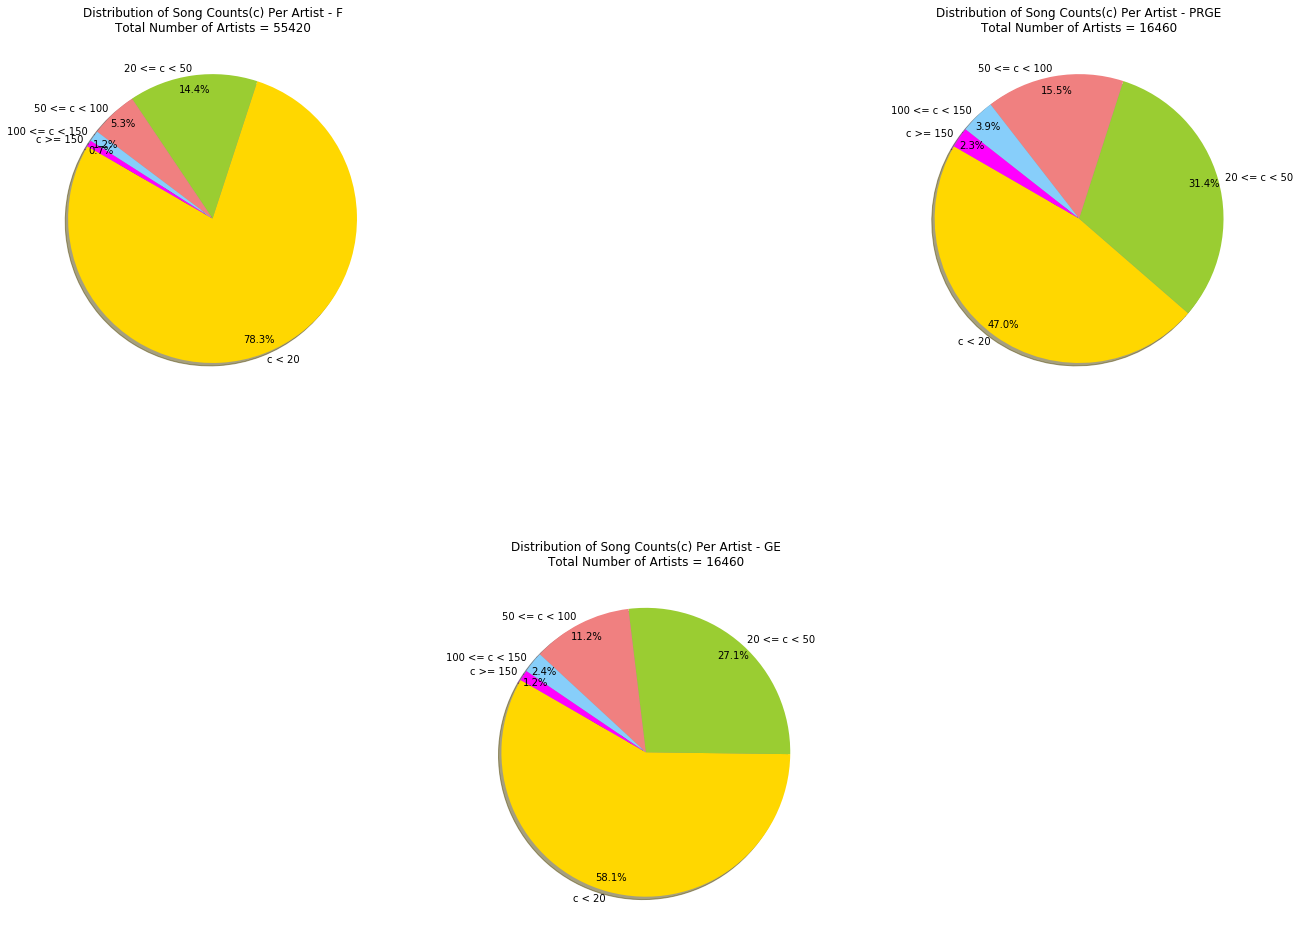

In [94]:
import numpy as np
import matplotlib.pyplot as plt

# Prepare Data
sorted_song_per_artist_count_F = {k: v for k, v in sorted(dict(Counter(artist_list_F)).items(), key=lambda item: item[1], reverse=True)}
sorted_song_per_artist_count_PRGE = {k: v for k, v in sorted(dict(Counter(artist_list_PRGE)).items(), key=lambda item: item[1], reverse=True)}
sorted_song_per_artist_count_GE = {k: v for k, v in sorted(dict(Counter(artist_list_GE)).items(), key=lambda item: item[1], reverse=True)}

song_count_list_F = [count for count in list(sorted_song_per_artist_count_F.values())]
song_count_list_PRGE = [count for count in list(sorted_song_per_artist_count_PRGE.values())]
song_count_list_GE = [count for count in list(sorted_song_per_artist_count_GE.values())]

# Data to plot
labels = 'c < 20', '20 <= c < 50', '50 <= c < 100', '100 <= c < 150', 'c >= 150'
bins_F = [sum(1 for i in song_count_list_F if i < 20),
        sum(1 for i in song_count_list_F if i >= 20 and i < 50),
        sum(1 for i in song_count_list_F if i >= 50 and i < 100),
        sum(1 for i in song_count_list_F if i >= 100 and i < 150),
        sum(1 for i in song_count_list_F if i >= 150)]
bins_PRGE = [sum(1 for i in song_count_list_PRGE if i < 20),
        sum(1 for i in song_count_list_PRGE if i >= 20 and i < 50),
        sum(1 for i in song_count_list_PRGE if i >= 50 and i < 100),
        sum(1 for i in song_count_list_PRGE if i >= 100 and i < 150),
        sum(1 for i in song_count_list_PRGE if i >= 150)]
bins_GE = [sum(1 for i in song_count_list_GE if i < 20),
        sum(1 for i in song_count_list_GE if i >= 20 and i < 50),
        sum(1 for i in song_count_list_GE if i >= 50 and i < 100),
        sum(1 for i in song_count_list_GE if i >= 100 and i < 150),
        sum(1 for i in song_count_list_GE if i >= 150)]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'magenta']
explode = (0., 0., 0., 0., 0.)  # explode slices

Ftotal = sum(bins_F)
PRGEtotal = sum(bins_PRGE)
GEtotal = sum(bins_GE)

## function for pie chart labels
#def labeling(x):
#    return '{:1.1f}% ({:.0f} songs)'.format(x, total*x/100)


# Plot
fig = plt.figure()

fig = plt.figure(figsize=(22,18))
#fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(22,22)) #ax1,ax2 refer to your two pies

ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(233)
axa = fig.add_subplot(232)
axb = fig.add_subplot(234)
axc = fig.add_subplot(236)
ax3 = fig.add_subplot(235)

fig.delaxes(axa) # this one deletes the desired axis
fig.delaxes(axb) # this one deletes the desired axis
fig.delaxes(axc) # this one deletes the desired axis



total = Ftotal
ax1.pie(bins_F, explode=explode, labels = labels, colors = colors, autopct = '%1.1f%%', shadow=True, startangle=150, pctdistance=0.9, labeldistance=1.05)
ax1.set_title('Distribution of Song Counts(c) Per Artist - F\nTotal Number of Artists = '+ str(Ftotal))

ax2.pie(bins_PRGE, explode=explode, labels = labels, colors = colors, autopct = '%1.1f%%', shadow=True, startangle=150, pctdistance=0.9, labeldistance=1.05)
ax2.set_title('Distribution of Song Counts(c) Per Artist - PRGE\nTotal Number of Artists = '+ str(PRGEtotal))

ax3.pie(bins_GE, explode=explode, labels = labels, colors = colors, autopct = '%1.1f%%', shadow=True, startangle=150, pctdistance=0.9, labeldistance=1.05)
ax3.set_title('Distribution of Song Counts(c) Per Artist - GE\nTotal Number of Artists = '+ str(GEtotal))

#plt.show()
plt.savefig('testplot.png')

# Print out some numbers
c_list = ["0-19", "20-49", "50-99", "100-149", "150"]
i = 0
for F, PRGE, GE, ranges in zip(bins_F, bins_PRGE, bins_GE, c_list):
    i += 1
    if i != 5:
        print(f'Number of artists with between {ranges} songs in F: {F}')
        print(f'Number of artists with between {ranges} songs in PRGE: {PRGE}')
        print(f'Number of artists with between {ranges} songs in GE: {GE}')
        print("\n")
    else:
        print(f'Number of artists with at least {ranges} songs in F: {F}')
        print(f'Number of artists with at least {ranges} songs in PRGE: {PRGE}')
        print(f'Number of artists with at least {ranges} songs in GE: {GE}')        



## Size

Song length box plots

In [95]:
import seaborn as sns

# write a function that plots a box plot showing the quartiles of song length collections
def song_length_box_plot(dataset_dictionary1, dataset_dictionary2):
    no_blank_lengths1 = [entry[6] for entry in list(dataset_dictionary1.values())]
    no_blank_lengths2 = [entry[6] for entry in list(dataset_dictionary2.values())]

    sns.set(style="whitegrid")
    flierprops = dict(color='red', markersize=0.1,
              linestyle='none')

    g1 = sns.boxplot(data=[no_blank_lengths1, no_blank_lengths2], linewidth=1, flierprops = flierprops,palette="Set2")

    g1.set(
        ylabel='Line Length (# of Tokens)'
    )
    g1.set(xticklabels=["PRGE", "GE"])

    plt.ylim(0, 300)
    plt.yticks(range(0,300,10))
    fig = plt.gcf()
    fig.set_size_inches(16,8)
    

    plt.show()
    


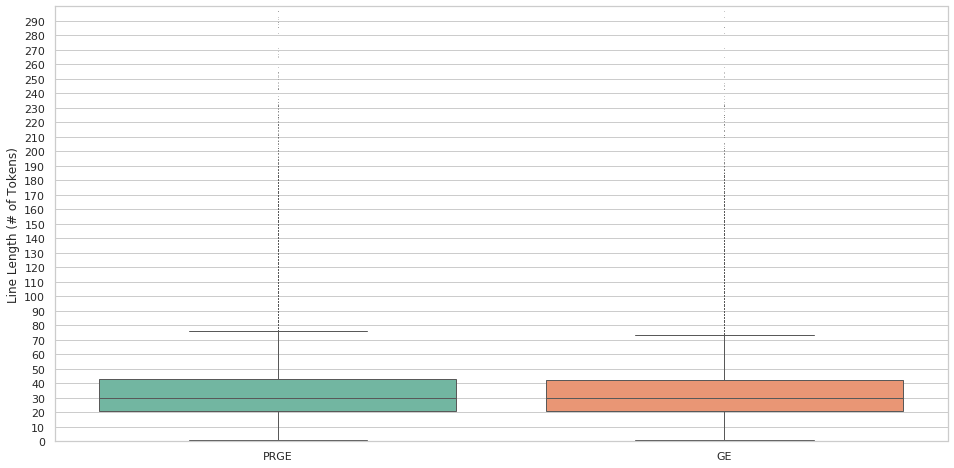

In [96]:
song_length_box_plot(EN_PRGE_metadata_dict, EN_GE_metadata_dict)

Song width box plots

In [43]:
# write a function that plots a box plot showing the quartiles of song width collections
def song_width_box_plot(dataset_dictionary, title = str):
    min_line_lengths = [entry[8] for entry in list(dataset_dictionary.values())]
    max_line_lengths = [entry[9] for entry in list(dataset_dictionary.values())]
    print(sum(min_line_lengths)/len(min_line_lengths), sum(max_line_lengths)/len(max_line_lengths))
    
    sns.set(style="whitegrid")
    flierprops = dict(color='red', markersize=0.1,
              linestyle='none')

    g1 = sns.boxplot(data=[min_line_lengths, max_line_lengths], linewidth=1, color="teal",flierprops = flierprops, orient='h',palette="Set2")

    g1.set(
        xlabel='Line Length (# of Tokens)'
    )
    g1.set(yticklabels=["Min ("+title+")", "Max ("+title+")"])
    print(np.percentile(min_line_lengths, [25]),np.percentile(max_line_lengths, [25]))
    print(np.percentile(min_line_lengths, [75]),np.percentile(max_line_lengths, [75]))
    plt.xlim(0, 40)
    fig = plt.gcf()
    fig.set_size_inches(10,6)

    plt.xticks(range(0,40,2))
    plt.show()

3.8146883576515926 14.437512416992952
[2.] [10.]
[4.] [15.]


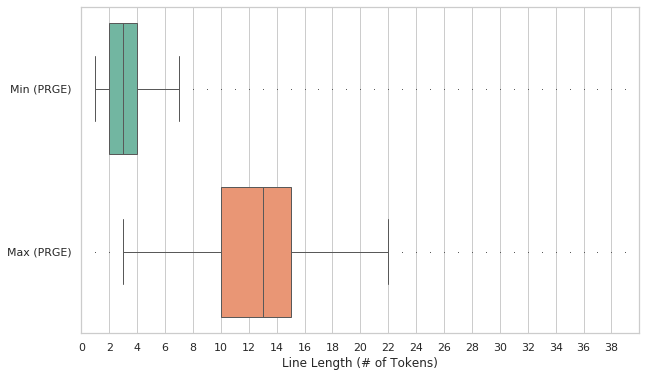

3.80650534379125 14.146749531968794
[2.] [10.]
[4.] [15.]


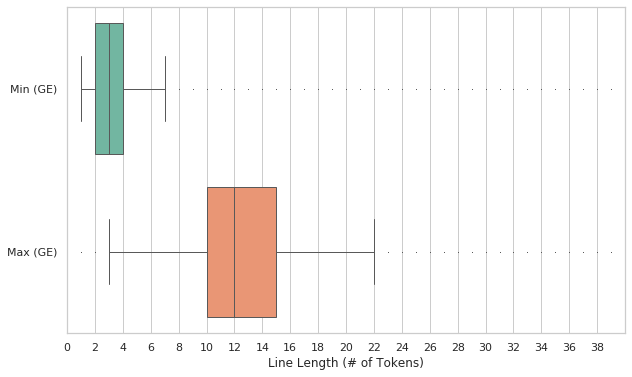

In [44]:
song_width_box_plot(EN_PRGE_metadata_dict, "PRGE")
song_width_box_plot(EN_GE_metadata_dict, "GE")